# Compare the analytical solution and the neural net 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("..")
from utils.model import Net
from scripts import data_example as de
import torch
import numpy as np
import matplotlib.pyplot as plt

In [3]:
model = Net()
model.load_state_dict(torch.load('../saved_models/model_weights_batchsize64_batches100000_epochs10.pth'))
model.eval()

Net(
  (layers): Sequential(
    (0): Linear(in_features=3, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=100, bias=True)
    (3): ReLU()
    (4): Linear(in_features=100, out_features=100, bias=True)
    (5): ReLU()
    (6): Linear(in_features=100, out_features=100, bias=True)
    (7): ReLU()
    (8): Linear(in_features=100, out_features=10, bias=True)
  )
)

In [4]:
d = np.array([5, -5, -10])
# Need to get the indicies for plotting
data_indices, _, _, _, _, _, _, _, _ = de.get_example_variables()

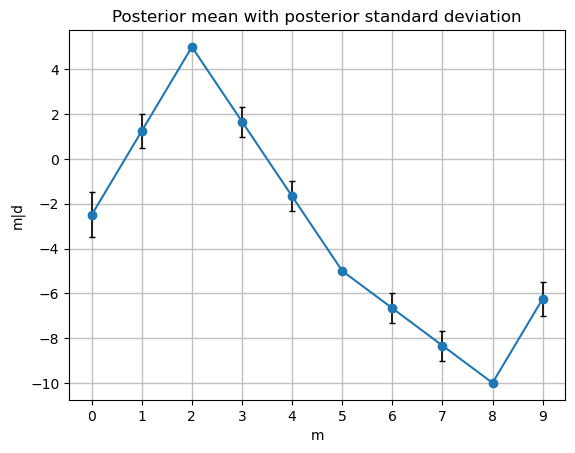

Text(0, 0.5, 'm|d')

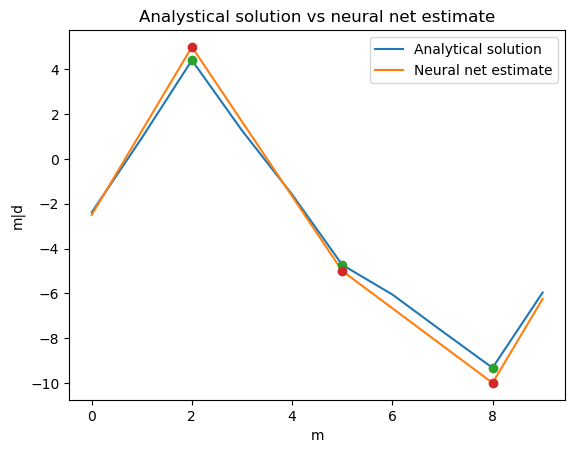

In [5]:
d_tensor = torch.tensor(d, dtype=torch.float)
out = model(d_tensor)
with torch.no_grad():
    out = out.numpy().flatten()

plt.figure()
post_mean, post_cov = de.get_posteior(d)
de.plot_posterior(post_mean, post_cov)

plt.figure()
plt.plot(range(10), out)
plt.plot(range(10), post_mean)
plt.legend(["Analytical solution", "Neural net estimate"])
plt.plot(data_indices, [out[i] for i in data_indices], 'o')
plt.plot(data_indices, [post_mean[i] for i in data_indices], 'o')
plt.title("Analystical solution vs neural net estimate")
plt.xlabel("m")
plt.ylabel("m|d")